# A Short Introduction to the boostsrl Python Package

In [31]:
# Let's start by importing the package, this can be installed with pip
from boostsrl import boostsrl

**Background Knowledge** can be specified in a way similar to how we are accustomed to seeing it. Instead of directly writing it to a background file, it created as a list of strings.

In [9]:
bk = [
    'cancer(+Person).',
    'friends(+Person, -Person).',
    'friends(-Person, +Person).',
    'smokes(+Person).'
]

In [22]:
# Let's create a background object:
# target should be a list of strings (to handle the case with multiple targets)
target = ['cancer']
background_knowledge = boostsrl.modes(bk, target, useStdLogicVariables=True, treeDepth=4, nodeSize=2)

Since we've constructed **background knowledge** as an object, later we will be able to extract whatever information we may be interested in.

Our next focus should be *creating the data.* In other situations this could just as easily be imported from a file, or created with a simulator for *reinforcement learning* domains.

In [14]:
train_pos = ['cancer(Alice).', 'cancer(Bob).', 'cancer(Chuck).', 'cancer(Fred).']
train_neg = ['cancer(Dan).','cancer(Earl).']
train_facts = [
    'friends(Alice, Bob).', 'friends(Alice, Fred).', 'friends(Chuck, Bob).',
    'friends(Chuck, Fred).', 'friends(Dan, Bob).', 'friends(Earl, Bob).',
    'friends(Bob, Alice).', 'friends(Fred, Alice).', 'friends(Bob, Chuck).',
    'friends(Fred, Chuck).', 'friends(Bob, Dan).', 'friends(Bob, Earl).',
    'smokes(Alice).', 'smokes(Chuck).', 'smokes(Bob).'
]

In [23]:
# Let's train our model.
model = boostsrl.train(background_knowledge, train_pos, train_neg, train_facts)

In [24]:
# Perhaps we want to know how many seconds it took the model to train.
print(model.traintime())

0.677


We now have a trained model, we can even see the trees!

In [51]:
# The 0th tree is generally the most interpretable.
print(model.tree(0, 'cancer'))

setParam: stringsAreCaseSensitive = true.

useStdLogicNotation: true.


(smokes(a) => cancer(a, 0.8581489350995121)).
cancer(_, 0.19148226843284552) /* #neg=2 #pos=1 */ .



In [52]:
# Subsequent trees seek to fit the error of those previous, so they'll sometimes be less so.
print(model.tree(1, 'cancer'))

setParam: stringsAreCaseSensitive = true.

useStdLogicNotation: true.


(smokes(a) => cancer(a, 0.7194734122109545)).
cancer(_, 0.16653882456488175) /* #neg=2 #pos=1 */ .



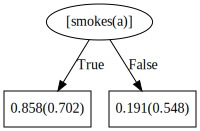

In [75]:
from graphviz import Source
src = Source('digraph G{ 1[label = "[smokes(a)]"];1 -> 2[label="True"];1 -> 3[label="False"];2[shape = box,label = "0.858(0.702)"];3[shape = box,label = "0.191(0.548)"];}')
src

### Perhaps now we want to apply our model to new data?

In [30]:
test_pos = ['cancer(Zod).', 'cancer(Xena).', 'cancer(Yoda).']
test_neg = ['cancer(Voldemort).', 'cancer(Watson).']
test_facts = ['friends(Zod, Xena).', 'friends(Xena, Watson).', 'friends(Watson, Voldemort).',
              'friends(Voldemort, Yoda).', 'friends(Yoda, Zod).', 'friends(Xena, Zod).', 
              'friends(Watson, Xena).', 'friends(Voldemort, Watson).',
              'friends(Yoda, Voldemort).', 'friends(Zod, Yoda).',
              'smokes(Zod).', 'smokes(Xena).', 'smokes(Yoda).'
             ]

In [34]:
# We'll create a test object using the trained model and the data above.
results = boostsrl.test(model, test_pos, test_neg, test_facts)

### Look at the results so we can judge performance.

In [48]:
results_dict = results.summarize_results()

for key in results_dict:
    print(key, results_dict[key])

CLL -0.223184
F1 1.000000
Recall 1.000000
Precision 1.000000,0.500
AUC ROC 1.000000
AUC PR 1.000000


In [50]:
inference_results_dict = results.inference_results('cancer')

for key in inference_results_dict:
    print(key, inference_results_dict[key])

!cancer(Watson) 0.692417902402
cancer(Xena) 0.880796191769
!cancer(Voldemort) 0.692417902402
cancer(Yoda) 0.880796191769
cancer(Zod) 0.880796191769
